
# Fraud Transaction Detection EDA
## Dataset Description
- **step** — maps a unit of time in the real world. 1 step = 1 hour. Total steps: 744 (30 days).
- **type** — Transaction type: `CASH-IN`, `CASH-OUT`, `DEBIT`, `PAYMENT`, `TRANSFER`.
- **amount** — Transaction amount (local currency).
- **nameOrig** — Originating customer ID.
- **oldbalanceOrg** — Initial balance before transaction.
- **newbalanceOrig** — New balance after transaction.
- **nameDest** — Destination customer ID.
- **oldbalanceDest** — Initial balance of recipient (NaN for merchants).
- **newbalanceDest** — New balance of recipient (NaN for merchants).
- **isFraud** — Transactions made by fraudulent agents.
- **isFlaggedFraud** — Flags illegal attempts (> 200,000 in a single transaction).


In [24]:

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.rcParams["figure.figsize"] = (10, 6)
sns.set_style("whitegrid")

df = pd.read_csv(""C:\Users\gokul\Downloads\Fraud.csv"")
df.head()


,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


In [26]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
step,6362620.0,2.433972e+02,1.423320e+02,1.0,156.00,239.000,3.350000e+02,7.430000e+02
amount,6362620.0,1.798619e+05,6.038582e+05,0.0,13389.57,74871.940,2.087215e+05,9.244552e+07
oldbalanceOrg,6362620.0,8.338831e+05,2.888243e+06,0.0,0.00,14208.000,1.073152e+05,5.958504e+07
newbalanceOrig,6362620.0,8.551137e+05,2.924049e+06,0.0,0.00,0.000,1.442584e+05,4.958504e+07
oldbalanceDest,6362620.0,1.100702e+06,3.399180e+06,0.0,0.00,132705.665,9.430367e+05,3.560159e+08
newbalanceDest,6362620.0,1.224996e+06,3.674129e+06,0.0,0.00,214661.440,1.111909e+06,3.561793e+08
isFraud,6362620.0,1.290820e-03,3.590480e-02,0.0,0.00,0.000,0.000000e+00,1.000000e+00
isFlaggedFraud,6362620.0,2.514687e-06,1.585775e-03,0.0,0.00,0.000,0.000000e+00,1.000000e+00


In [27]:
df.isnull().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

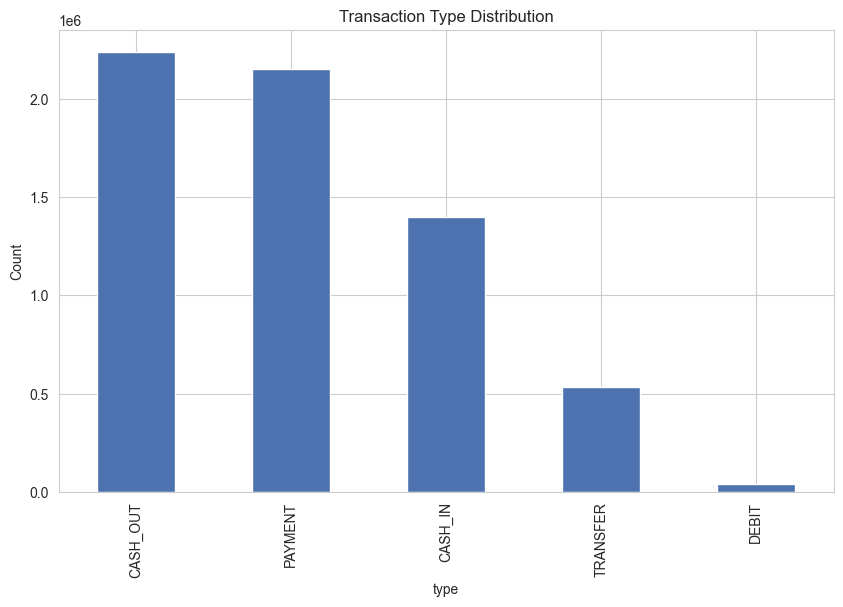

In [28]:

df['type'].value_counts().plot(kind='bar', color="#4C72B0")
plt.title("Transaction Type Distribution")
plt.ylabel("Count")
plt.show()


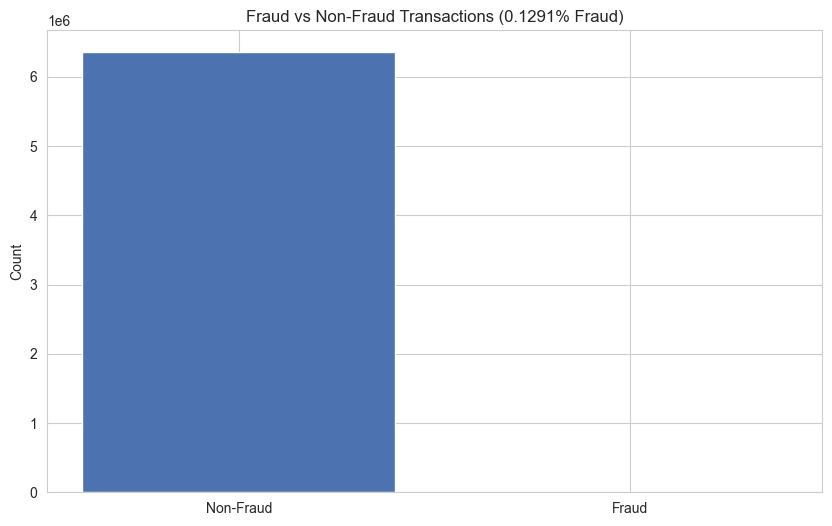

In [29]:

fraud_counts = df['isFraud'].value_counts()
fraud_percentage = (fraud_counts[1] / len(df)) * 100

plt.bar(['Non-Fraud', 'Fraud'], fraud_counts.values, color=["#4C72B0", "#DD8452"])
plt.title(f"Fraud vs Non-Fraud Transactions ({fraud_percentage:.4f}% Fraud)")
plt.ylabel("Count")
plt.show()


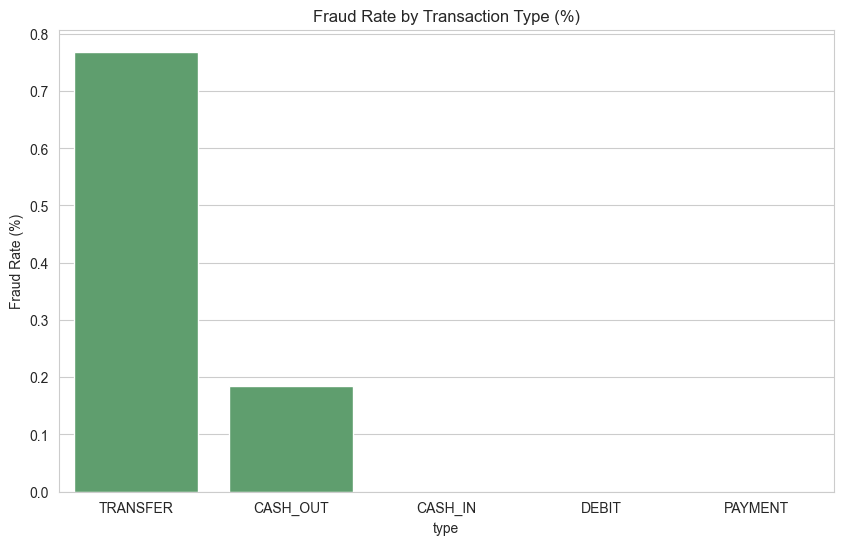

In [30]:

fraud_by_type = df.groupby('type')['isFraud'].mean().sort_values(ascending=False) * 100
sns.barplot(x=fraud_by_type.index, y=fraud_by_type.values, color="#55A868")
plt.title("Fraud Rate by Transaction Type (%)")
plt.ylabel("Fraud Rate (%)")
plt.show()


In [31]:
df['isFlaggedFraud'].value_counts()

isFlaggedFraud
0    6362604
1         16
Name: count, dtype: int64

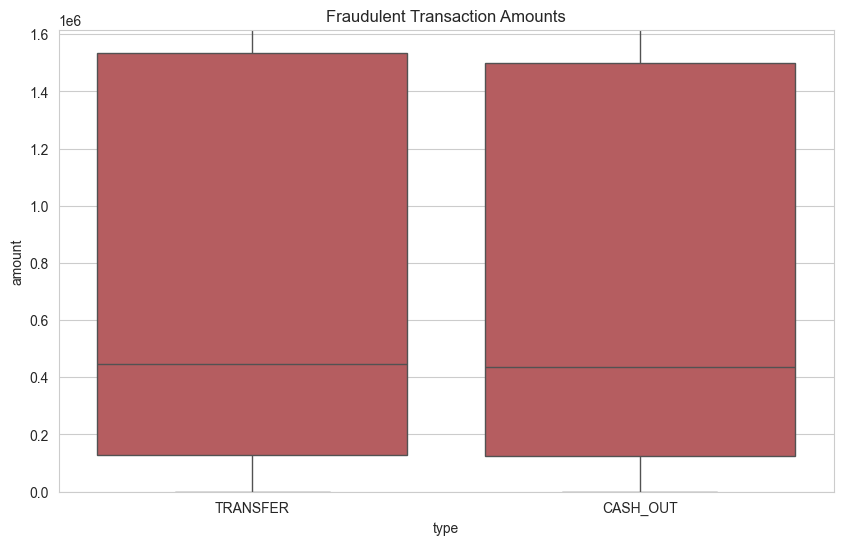

In [32]:

sns.boxplot(data=df[df['isFraud'] == 1], x='type', y='amount', color="#C44E52")
plt.title("Fraudulent Transaction Amounts")
plt.ylim(0, df['amount'].quantile(0.99))
plt.show()


In [33]:

df[(df['type'] == 'TRANSFER') & (df['amount'] > 200000)]


,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
19,1,TRANSFER,215310.30,C1670993182,705.00,0.0,C1100439041,22425.00,0.00,0,0
24,1,TRANSFER,311685.89,C1984094095,10835.00,0.0,C932583850,6267.00,2719172.89,0,0
82,1,TRANSFER,224606.64,C873175411,0.00,0.0,C766572210,354678.92,0.00,0,0
84,1,TRANSFER,379856.23,C1449772539,0.00,0.0,C1590550415,900180.00,19169204.93,0,0
85,1,TRANSFER,1505626.01,C926859124,0.00,0.0,C665576141,29031.00,5515763.34,0,0
...,...,...,...,...,...,...,...,...,...,...,...
6362608,742,TRANSFER,258355.42,C1226129332,258355.42,0.0,C1744173808,0.00,0.00,1,0
6362612,743,TRANSFER,1258818.82,C1531301470,1258818.82,0.0,C1470998563,0.00,0.00,1,0
6362614,743,TRANSFER,339682.13,C2013999242,339682.13,0.0,C1850423904,0.00,0.00,1,0
6362616,743,TRANSFER,6311409.28,C1529008245,6311409.28,0.0,C1881841831,0.00,0.00,1,0


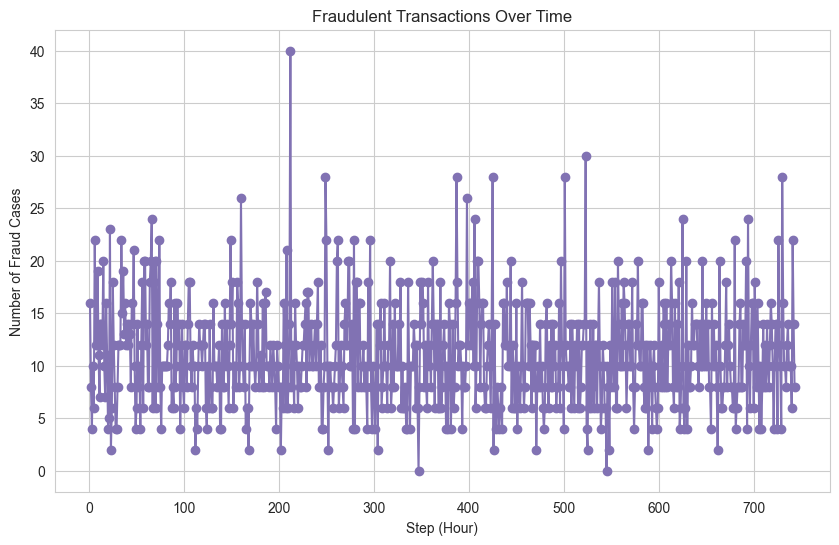

In [34]:

fraud_trend = df.groupby('step')['isFraud'].sum()
plt.plot(fraud_trend.index, fraud_trend.values, marker='o', color="#8172B3")
plt.title("Fraudulent Transactions Over Time")
plt.xlabel("Step (Hour)")
plt.ylabel("Number of Fraud Cases")
plt.show()
